# Assignment 4 - Pandas
This assignment is about data processing and plotting.

## Obnoxious Consequence
- Martin Snedvig Rasmussen
- Michael Ejdal Lundsgaard
- Morten Bokkenheuser-Bæhr


## Use pandas dataframe with poverty data
Use this source: https://data.worldbank.org/indicator/SI.POV.DDAY and extract the csv file in jupyter notebook.
With the help of Pandas' DataFrame do the following
1. Create a line graph showing the development in poverty over time in both Argentina, Ivory cost, USA. (be aware of the missing data in particular years)
2. Find the 10 countries with the highest poverty rate, and plot the rates in a bar chart
3. Show the development of absolute poverty in all the central american countries. Hand in:
  1. A description of what graphical representation you think is best for this task
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html
  2. The actual graphical representation in a Jupyter Notebook
4. From the worldbank api, find one more interesting question you would like to ask. Hand in:
  1. A description of why that question is interesting
  2. A visualisation of the question in your Jupyter Notebook
    * See this page for inspiration: https://scipy-lectures.org/intro/matplotlib/matplotlib.html


## Downloading the file

In [2]:
import pandas as pd
import requests
import zipfile
from glob import glob

url = 'http://api.worldbank.org/v2/en/indicator/SI.POV.DDAY?downloadformat=csv'

response = requests.get(url)
print(response.headers, "\n")

# --------------- Extracting Filename -------------------- #

fname = response.headers['Content-Disposition'].split('=')[1]
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)
print('Downloaded {}'.format(fname), "\n")

# --------------- Unpacking Zipfile -------------------- #

zipfile.ZipFile(fname, 'r').extractall('.')

# --------------- Finding the File -------------------- #

local_file = glob('./*API_SI*.csv')[0]
print(local_file)
      
# --------------- Reading the File -------------------- #
      
df = pd.read_csv(local_file,skiprows=4)

{'Date': 'Thu, 07 Mar 2019 10:56:28 GMT', 'Content-Type': 'application/zip', 'Content-Length': '18011', 'Connection': 'keep-alive', 'Content-Disposition': 'attachment; filename=API_SI.POV.DDAY_DS2_en_csv_v2_10474275.zip', 'X-Powered-By': 'ASP.NET', 'Set-Cookie': 'TS01fa65e4=01359ee9762d4bdcfa81535dcdd7367488028b67b3c828953ec3d691d0723e483be8d1a673; Path=/', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains', 'X-XSS-Protection': '1; mode=block', 'X-Content-Type-Options': 'nosniff', 'X-Frame-Options': 'deny'} 

Downloaded API_SI.POV.DDAY_DS2_en_csv_v2_10474275.zip 

.\API_SI.POV.DDAY_DS2_en_csv_v2_10474275.csv


## Part - 1

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'Percentage')

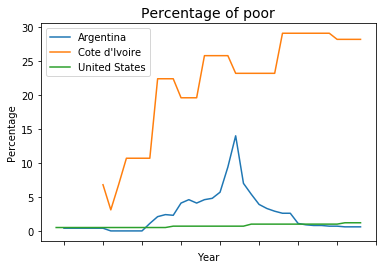

In [28]:
%pylab inline
import matplotlib.pyplot as plt

c_code_df=df[df['Country Name'].isin(['United States', 'Argentina', "Cote d'Ivoire"])]['Country Code']

# Lists the data - try and print() it
ts_df = df.iloc[c_code_df.index, 4:-1].T

ts_df.ffill().plot()
plt.legend(["Argentina","Cote d'Ivoire","United States"])
plt.title("Percentage of poor", fontsize=14)
plt.xlabel("Year", fontsize=10)
plt.ylabel("Percentage", fontsize=10)


## Part - 2

## Part - 3

## Part - 4